# Homework 3 | Survival Analysis

Professor: Karen Hovhannisyan

Student: Elen Petrosyan


### Parametric Models

In [23]:
# Import libraries
import pandas as pd
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('telco.csv')

print(df.head())

   ID  region  tenure  age    marital  address  income  \
0   1  Zone 2      13   44    Married        9      64   
1   2  Zone 3      11   33    Married        7     136   
2   3  Zone 3      68   52    Married       24     116   
3   4  Zone 2      33   33  Unmarried       12      33   
4   5  Zone 2      23   30    Married        9      30   

                             ed retire  gender voice internet forward  \
0                College degree     No    Male    No       No     Yes   
1     Post-undergraduate degree     No    Male   Yes       No     Yes   
2  Did not complete high school     No  Female    No       No      No   
3            High school degree     No  Female    No       No      No   
4  Did not complete high school     No    Male    No       No     Yes   

         custcat churn  
0  Basic service   Yes  
1  Total service   Yes  
2   Plus service    No  
3  Basic service   Yes  
4   Plus service    No  


In [ ]:
def new_data(input_data):
    processed_data = input_data.copy()

    # Drop 'ID' column
    processed_data.drop(['ID'], axis=1, inplace=True)

    # Convert 'churn' to categorical
    processed_data['churn'] = processed_data['churn'].astype('category')

    # Identify categorical columns
    categorical_cols = ['region', 'retire', 'marital', 'ed', 'gender', 'voice', 'internet', 'custcat', 'forward']

    # Handle categorical columns using one-hot encoding
    processed_data = pd.get_dummies(processed_data, columns=categorical_cols, drop_first=True)

    return processed_data

In [ ]:
data = new_data(df)

In [ ]:
data

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,retire_Yes,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Male,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,forward_Yes
0,13,44,9,64,Yes,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,11,33,7,136,Yes,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1
2,68,52,24,116,No,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,33,33,12,33,Yes,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,23,30,9,30,No,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,27,No,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
996,7,34,2,22,No,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
997,67,59,40,944,No,0,1,0,1,0,0,1,0,0,1,1,0,0,1,1
998,70,49,18,87,No,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1


In [ ]:
# mapping 'Yes' to 1 and 'No' to 0 in the 'churn' column
data['churn'] = data['churn'].map({'Yes': 1, 'No': 0})

In [ ]:
def build_aft_models(data):
    distributions = ['weibull', 'lognormal', 'loglogistic']

    for distribution in distributions:
        if distribution == 'weibull':
            model = WeibullAFTFitter()
        elif distribution == 'lognormal':
            model = LogNormalAFTFitter()
        elif distribution == 'loglogistic':
            model = LogLogisticAFTFitter()

        # Fit the AFT model
        model.fit(data, duration_col='tenure', event_col='churn')

        # Print the summary of the model
        print(f"\nSummary for {distribution} distribution:")
        print(model.summary)

# Assuming 'data' is your processed dataset
build_aft_models(data)


Summary for weibull distribution:
                                             coef  exp(coef)  se(coef)  \
param   covariate                                                        
lambda_ address                          0.041363   1.042230  0.008821   
        age                              0.027802   1.028192  0.006748   
        custcat_E-service                0.977597   2.658060  0.155731   
        custcat_Plus service             0.739767   2.095447  0.192965   
        custcat_Total service            0.995856   2.707040  0.213172   
        ed_Did not complete high school  0.437873   1.549409  0.194276   
        ed_High school degree            0.319959   1.377071  0.145973   
        ed_Post-undergraduate degree     0.223556   1.250516  0.190606   
        ed_Some college                  0.253833   1.288957  0.144665   
        forward_Yes                     -0.098678   0.906034  0.148202   
        gender_Male                      0.004320   1.004329  0.103055   
   

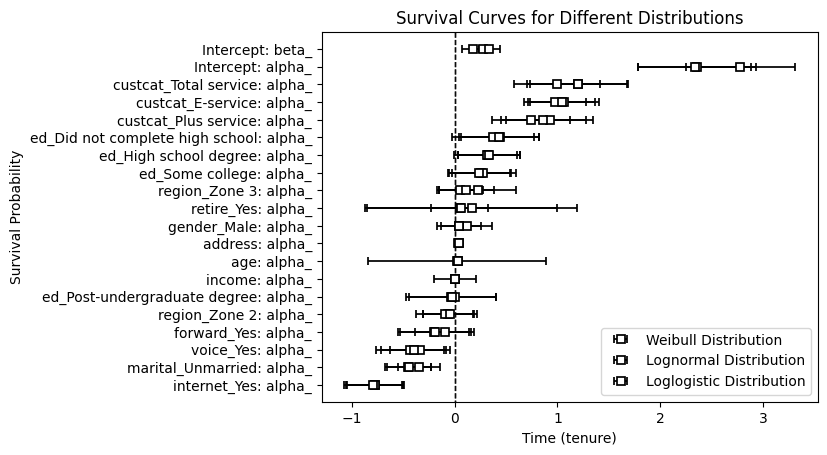

In [ ]:
def visualize_survival_curves(data):
    distributions = ['weibull', 'lognormal', 'loglogistic']

    #creating subplots
    fig, ax = plt.subplots()

    for distribution in distributions:
        if distribution == 'weibull':
            model = WeibullAFTFitter()
        elif distribution == 'lognormal':
            model = LogNormalAFTFitter()
        elif distribution == 'loglogistic':
            model = LogLogisticAFTFitter()

        # Fitting the AFT model
        model.fit(data, duration_col='tenure', event_col='churn')

        # Ploting the survival function
        model.plot(ax=ax, label=f"{distribution.capitalize()} Distribution")

    # Set plot labels and legend
    ax.set_xlabel("Time (tenure)")
    ax.set_ylabel("Survival Probability")
    ax.set_title("Survival Curves for Different Distributions")
    ax.legend()

    plt.show()

visualize_survival_curves(data)

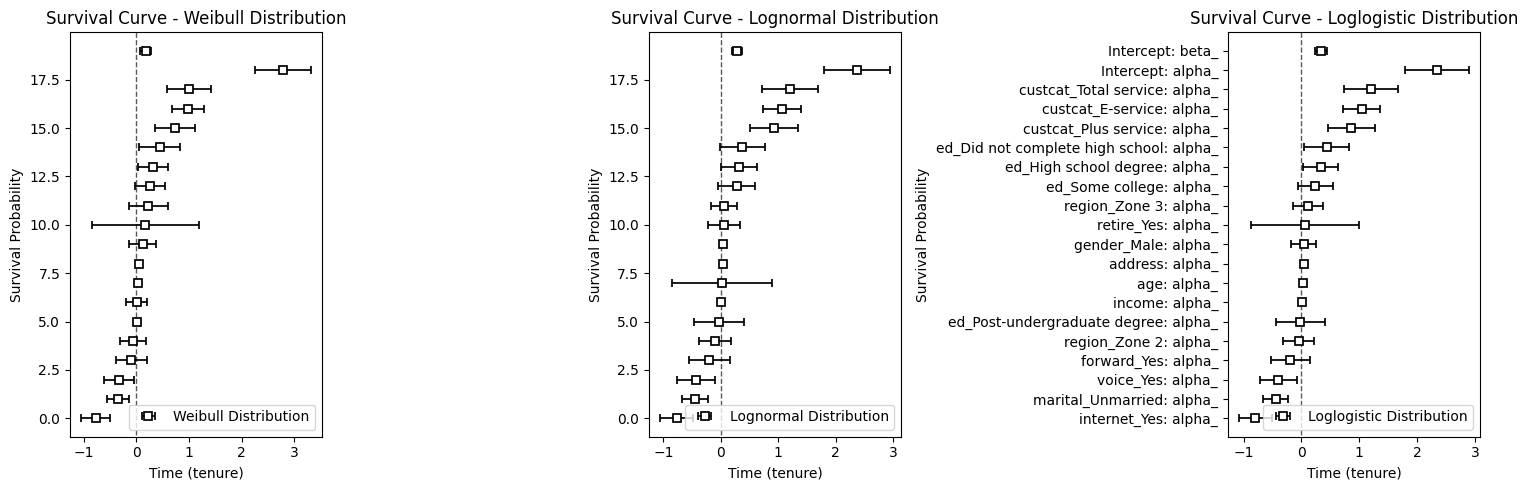

In [ ]:
def visualize_survival_curves(data):
    distributions = ['weibull', 'lognormal', 'loglogistic']

    # separate subplots for each distribution
    fig, axes = plt.subplots(1, len(distributions), figsize=(15, 5))

    for i, distribution in enumerate(distributions):
        if distribution == 'weibull':
            model = WeibullAFTFitter()
        elif distribution == 'lognormal':
            model = LogNormalAFTFitter()
        elif distribution == 'loglogistic':
            model = LogLogisticAFTFitter()

        # Fitting the AFT model
        model.fit(data, duration_col='tenure', event_col='churn')

        # Ploting the survival function on the i-th subplot
        model.plot(ax=axes[i], label=f"{distribution.capitalize()} Distribution")

        # plot labels and title for each subplot
        axes[i].set_xlabel("Time (tenure)")
        axes[i].set_ylabel("Survival Probability")
        axes[i].set_title(f"Survival Curve - {distribution.capitalize()} Distribution")
        axes[i].legend()

    plt.tight_layout()

    plt.show()

visualize_survival_curves(data)

### CLV

In [ ]:
significant_columns = ["address", "age", "internet_Yes", "marital_Unmarried", "tenure", "churn",
                       "custcat_E-service", "custcat_Plus service", "custcat_Total service", "voice_Yes"]

new_data = data[significant_columns]
new_data

,address,age,internet_Yes,marital_Unmarried,tenure,churn,custcat_E-service,custcat_Plus service,custcat_Total service,voice_Yes
0,9,44,0,0,13,1,0,0,0,0
1,7,33,0,0,11,1,0,0,1,1
2,24,52,0,0,68,0,0,1,0,0
3,12,33,0,1,33,1,0,0,0,0
4,9,30,0,0,23,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,39,0,1,10,0,0,0,0,0
996,2,34,0,1,7,0,0,0,0,0
997,40,59,1,1,67,0,0,0,1,1
998,18,49,0,1,70,0,0,1,0,1


In [ ]:
new_data.columns

Index(['address', 'age', 'internet_Yes', 'marital_Unmarried', 'tenure',
       'churn', 'custcat_E-service', 'custcat_Plus service',
       'custcat_Total service', 'voice_Yes'],
      dtype='object')

In [22]:
# Monthly revenue per customer
monthly_revenue_per_customer = 100


discount_rate = 0.1

# CLV for each segment
def calculate_clv(segment_data):
    segment_data['CLV'] = (monthly_revenue_per_customer * (1 - discount_rate) * segment_data['tenure']) / discount_rate
    return segment_data

# CLV for the entire dataset
all_data = new_data.copy()
all_data = calculate_clv(all_data)

# List of columns
columns_for_clv = ['address', 'age', 'internet_Yes', 'marital_Unmarried', 'tenure',
                   'churn', 'custcat_E-service', 'custcat_Plus service',
                   'custcat_Total service', 'voice_Yes']

# CLV grouped by each specified column
for column in columns_for_clv:
    clv_by_column = all_data.groupby(column)['CLV'].mean()
    print(f"\nCLV Results for {column}:")
    print(clv_by_column)



CLV Results for address:
address
0     20201.785714
1     21917.647059
2     23686.363636
3     21496.721311
4     23459.016393
5     26298.000000
6     24250.000000
7     23654.716981
8     29792.307692
9     25770.731707
10    35455.263158
11    31147.826087
12    33325.000000
13    31036.363636
14    35475.000000
15    37612.500000
16    33235.714286
17    38372.727273
18    45540.000000
19    39568.965517
20    40545.000000
21    46800.000000
22    44520.000000
23    46320.000000
24    48225.000000
25    44925.000000
26    45825.000000
27    47418.750000
28    48075.000000
29    53100.000000
30    51136.363636
31    50550.000000
32    48780.000000
33    51840.000000
34    51750.000000
35    49050.000000
36    58500.000000
37    60900.000000
38    51480.000000
39    61200.000000
40    62100.000000
41    64800.000000
42    52200.000000
43    53700.000000
44    47700.000000
45    64800.000000
46    58500.000000
48    64800.000000
49    64800.000000
55    60300.000000
Name: CLV, dtype

The parametric models using Weibull, LogNormal, and LogLogistic distributions were applied to investigate factors influencing churn risk in a telco dataset. For instance, positive coefficients suggest an increased risk of churn, while negative coefficients indicate a reduced risk. In exploring valuable segments, CLV was calculated for various factors such as 'address,' 'age,' ... These CLV outcomes offer a monetary perspective on different customer segments to identify high-value customer groups.

Assuming the dataset represents the entire population, estimating the annual retention budget involves a holistic assessment of CLV, survival probabilities, and identifying at-risk subscribers within a year. This entails a thorough examination of customer tenure, churn probabilities, and corresponding CLV to facilitate efficient resource allocation. To enhance retention strategies, it is recommended to delve deeper into variables significantly impacting churn risk and implement targeted initiatives such as personalized communication strategies, customer surveys, and addressing identified pain points for a more effective customer retention approach. Visualizing time-dependent churn probabilities through survival curves for various distributions provides additional insights into customer behavior, contributing to a more nuanced understanding of the retention landscape.

Implementing customer retention strategies and overall enhancing retention through can be done by personalized communication, proactive support, loyalty programs, and continuous data analysis. Optimize onboarding, foster community engagement, and analyze exit interviews for a comprehensive approach.